# Image Classification of an American Sign Language Dataset

In this section, we will perform the data preparation, model creation, and model training steps we observed in the last section using a different dataset: images of hands making letters in [American Sign Language](http://www.asl.gs/).

## Objectives

* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

## American Sign Language Dataset

The [American Sign Language alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset.  

<img src="images/asl.png" style="width: 600px;">

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

## Loading the Data

This dataset is not available via Keras in the same way that MNIST is, so let's learn how to load custom data. By the end of this section we will have `x_train`, `y_train`, `x_valid`, and `y_valid` variables as before.

### Reading in the Data

The sign language dataset is in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values) format, the same data structure behind Microsoft Excel and Google Sheets. It is a grid of rows and columns with labels at the top, as seen in the [train](data/asl_data/sign_mnist_train.csv) and [valid](data/asl_data/sign_mnist_valid.csv) datasets (they may take a moment to load).

To load and work with the data, we'll be using a library called [Pandas](https://pandas.pydata.org/), which is a highly performant tool for loading and manipulating data. We'll read the CSV files into a format called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [5]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Pandas has a [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method that expects a csv file, and returns a DataFrame:

In [6]:
train_df = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI612/main/Week3/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI612/main/Week3/asl_data/sign_mnist_valid.csv")

### Exploring the Data

Let's take a look at our data. We can use the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method to print the first few rows of the DataFrame. Each row is an image which has a `label` column, and also, 784 values representing each pixel value in the image, just like with the MNIST dataset. Note that the labels currently are numerical values, not letters of the alphabet:

In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Extracting the Labels

As with MNIST, we would like to store our training and validation labels in `y_train` and `y_valid` variables. Here we create those variables and then delete the labels from our original dataframes, where they are no longer needed:

In [8]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### Extracting the Images

As with MNIST, we would like to store our training and validation images in `x_train` and `x_valid` variables. Here we create those variables:

In [9]:
x_train = train_df.values
x_valid = valid_df.values

### Summarizing the Training and Validation Data

We now have 27,455 images with 784 pixels each for training...

In [10]:
x_train.shape

(27455, 784)

...as well as their corresponding labels:

In [11]:
y_train.shape

(27455,)

For validation, we have 7,172 images...

In [12]:
x_valid.shape

(7172, 784)

...and their corresponding labels:

In [13]:
y_valid.shape

(7172,)

## Visualizing the Data

To visualize the images, we will again use the matplotlib library. We don't need to worry about the details of this visualization, but if interested, you can learn more about [matplotlib](https://matplotlib.org/) at a later time.

Note that we'll have to reshape the data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

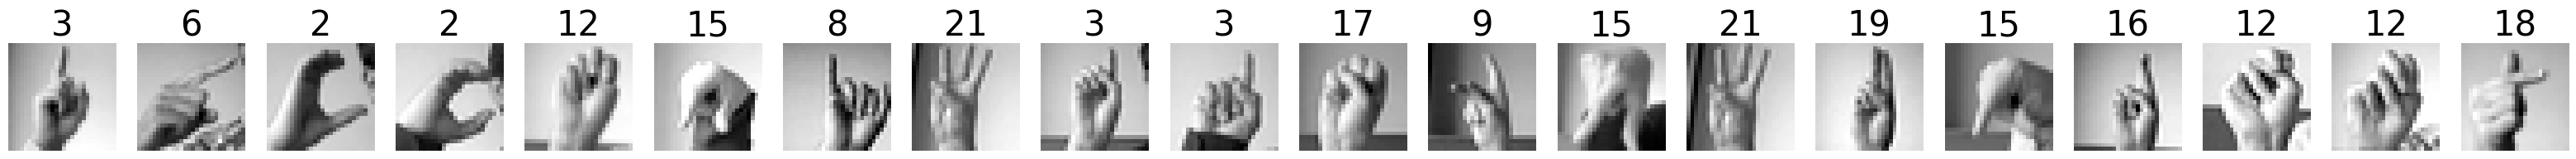

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## To DO: Normalize the Image Data

As we did with the MNIST dataset, we are going to normalize the image data, meaning that their pixel values, instead of being between 0 and 255 as they are currently:

In [15]:
x_train.min()

np.int64(0)

In [16]:
x_train.max()

np.int64(255)

...should be floating point values between 0 and 1. Use the following cell to work. If you get stuck, look at the solution below.

In [17]:
# TODO: Normalize x_train and x_valid.
x_train = x_train / 255
x_valid = x_valid / 255

## To do: Categorize the Labels

As we did with the MNIST dataset, we are going to categorically encode the labels. Recall that we can use the [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method to accomplish this by passing it the values to encode, and, the number of categories to encode it into. Do your work in the cell below. We have imported `keras` and set the number of categories (24) for you.

In [18]:
import tensorflow.keras as keras
num_classes = 24

In [19]:
# TODO: Categorically encode y_train and y_valid.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)



## To do: Build the Model

The data is all prepared, we have normalized images for training and validation, as well as categorically encoded labels for training and validation.

For this exercise we are going to build a sequential model. Just like last time, build a model that:
* Has a dense input layer. This layer should contain 512 neurons, use the `relu` activation function, and expect input images with a shape of `(784,)`
* Has a second dense layer with 512 neurons which uses the `relu` activation function
* Has a dense output layer with neurons equal to the number of classes, using the `softmax` activation function

Do your work in the cell below, creating a `model` variable to store the model. We've imported the Keras [Sequental](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class and [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class to get you started. Reveal the solution below for a hint:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# TODO: build a model following the guidelines above.
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 24, activation='softmax'))

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Summarizing the Model

Run the cell below to summarize the model you just created:

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

We'll [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) our model with the same options as before, using [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model:

In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## To do: Train the Model

Use the model's `fit` method to train it for 20 epochs using the training and validation images and labels created above:

In [24]:
# TODO: Train the model for 20 epochs.
history = model.fit(
    x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2416 - loss: 2.4977 - val_accuracy: 0.5482 - val_loss: 1.3203
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6332 - loss: 1.0957 - val_accuracy: 0.5584 - val_loss: 1.2563
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7821 - loss: 0.6429 - val_accuracy: 0.7313 - val_loss: 0.8124
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8648 - loss: 0.4168 - val_accuracy: 0.7970 - val_loss: 0.7208
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9094 - loss: 0.3040 - val_accuracy: 0.7764 - val_loss: 0.8225
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9332 - loss: 0.2396 - val_accuracy: 0.7418 - val_loss: 1.3240
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9483 - loss: 0.2262 - val_accuracy: 0.7048 - val_loss: 1.5571
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9507 - loss: 0.1998 - val_a

## Discussion: What happened?

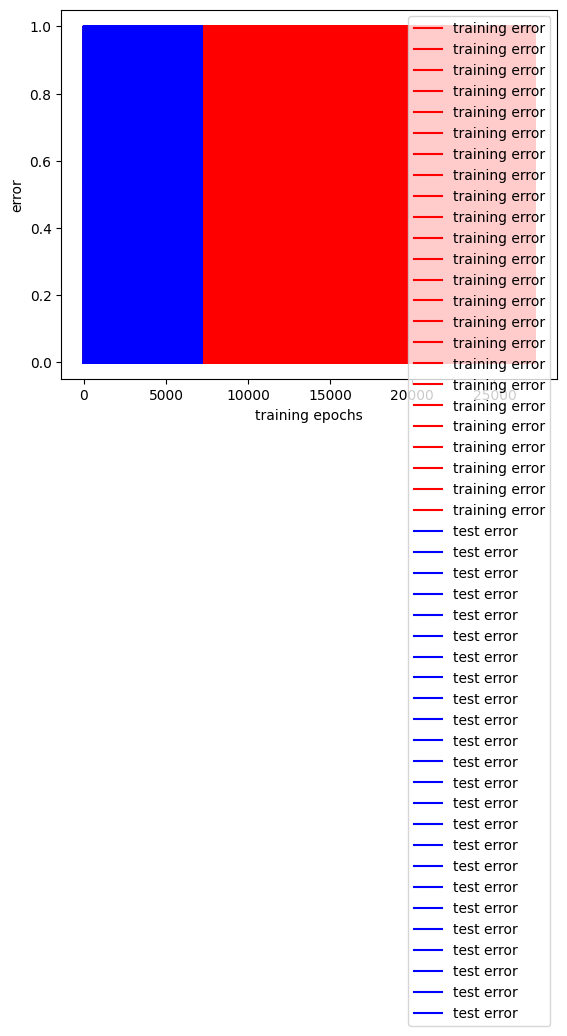

In [ ]:
import matplotlib.pyplot as plt


plt.plot( x_train, y_train, 'r-',label='training error')
plt.plot( x_valid, y_valid, 'b-',label='test error')
plt.xlabel('training epochs')
plt.ylabel('error')
plt.legend()
plt.show()



We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What happened here?

what the result shows is a sign of overfitting, this is when the model perform well on the training data and poorly on the testing data.

## Summary

In this section you built your own neural network to perform image classification that is quite accurate. Congrats!

At this point we should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with prepared data.